In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('heart.csv')

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:title={'center':'Correlation'}>

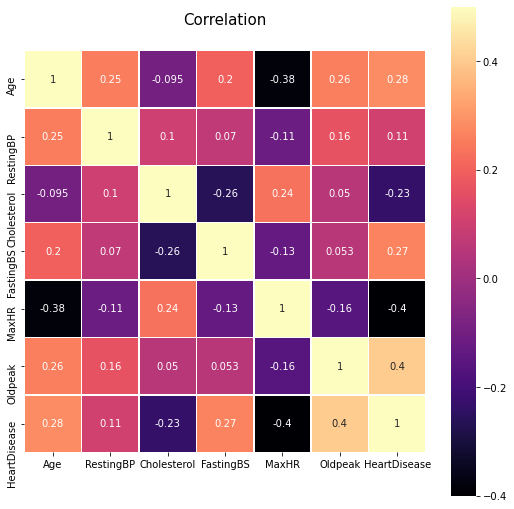

In [6]:
colormap = plt.cm.magma
plt.figure(figsize=(9,9))
plt.title('Correlation', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.5,vmax=0.5, square=True, cmap=colormap, linecolor='white', annot=True)

C:\Users\malsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


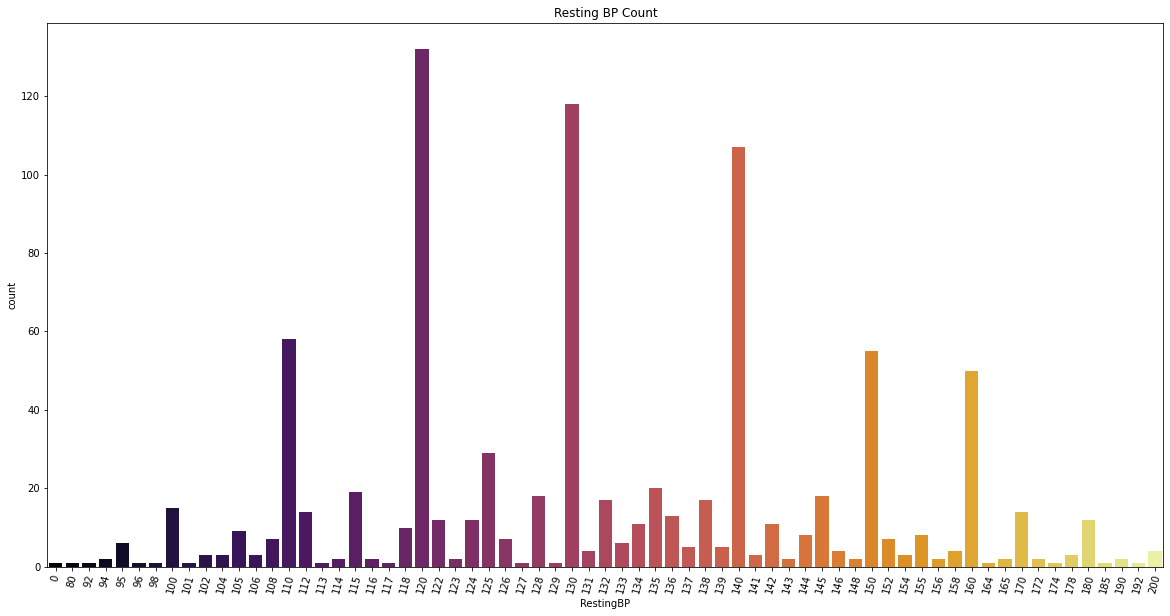

In [7]:
plt.figure(figsize=(20,10)) 
plt.xticks(rotation = 75)
plt.title('Resting BP Count')
sns.countplot(data.RestingBP,palette='inferno')
plt.show()

C:\Users\malsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


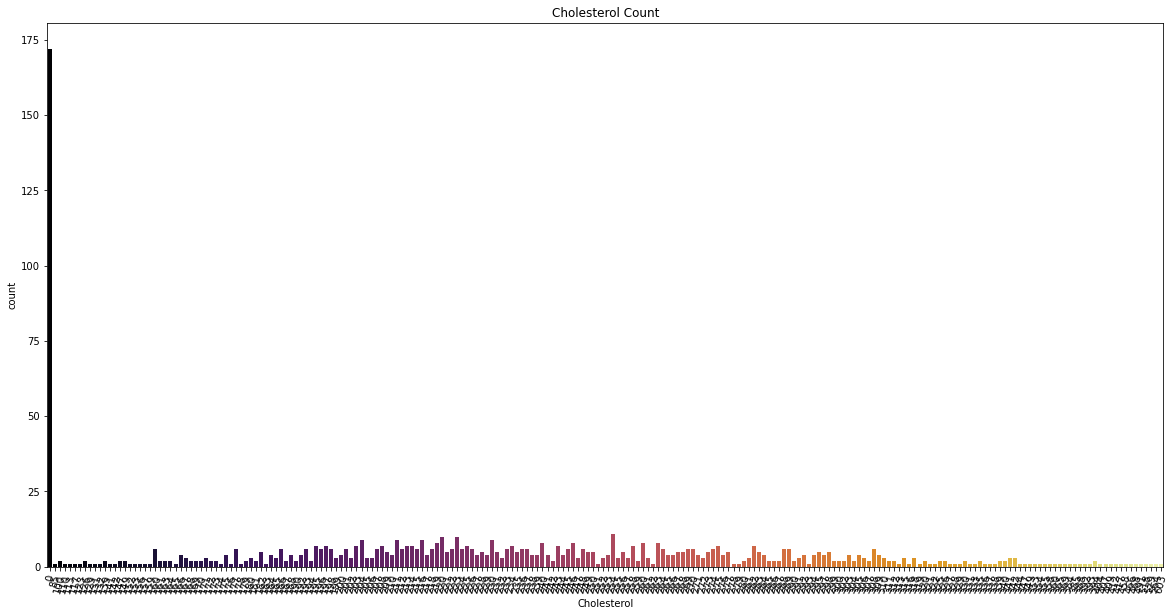

In [8]:
plt.figure(figsize=(20,10)) 
plt.xticks(rotation = 75)
plt.title('Cholesterol Count')
sns.countplot(data.Cholesterol,palette='inferno')
plt.show()

In [9]:
data['RestingBP']=data['RestingBP'].replace(0,data['RestingBP'].mean())
data = data.drop(columns = ['Cholesterol'])

In [10]:
data.describe()

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540737,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989932,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [12]:
preprocessing = data

In [13]:
ohe_results = ohe.fit_transform(preprocessing[['ChestPainType']])
pd.DataFrame(ohe_results.toarray(), columns=ohe.categories_)
processed_data1 = preprocessing.join(pd.DataFrame(ohe_results.toarray(), columns=ohe.categories_))
processed_data1

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,"(ASY,)","(ATA,)","(NAP,)","(TA,)"
0,40,M,ATA,140.0,0,Normal,172,N,0.0,Up,0,0.0,1.0,0.0,0.0
1,49,F,NAP,160.0,0,Normal,156,N,1.0,Flat,1,0.0,0.0,1.0,0.0
2,37,M,ATA,130.0,0,ST,98,N,0.0,Up,0,0.0,1.0,0.0,0.0
3,48,F,ASY,138.0,0,Normal,108,Y,1.5,Flat,1,1.0,0.0,0.0,0.0
4,54,M,NAP,150.0,0,Normal,122,N,0.0,Up,0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,0,Normal,132,N,1.2,Flat,1,0.0,0.0,0.0,1.0
914,68,M,ASY,144.0,1,Normal,141,N,3.4,Flat,1,1.0,0.0,0.0,0.0
915,57,M,ASY,130.0,0,Normal,115,Y,1.2,Flat,1,1.0,0.0,0.0,0.0
916,57,F,ATA,130.0,0,LVH,174,N,0.0,Flat,1,0.0,1.0,0.0,0.0


In [14]:
ohe2 = OneHotEncoder()
ohe_results2 = ohe2.fit_transform(processed_data1[['RestingECG']])
processed_data2 = processed_data1.join(pd.DataFrame(ohe_results2.toarray(), columns=ohe2.categories_))
processed_data2

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,"(ASY,)","(ATA,)","(NAP,)","(TA,)","(LVH,)","(Normal,)","(ST,)"
0,40,M,ATA,140.0,0,Normal,172,N,0.0,Up,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,49,F,NAP,160.0,0,Normal,156,N,1.0,Flat,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,M,ATA,130.0,0,ST,98,N,0.0,Up,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,48,F,ASY,138.0,0,Normal,108,Y,1.5,Flat,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,54,M,NAP,150.0,0,Normal,122,N,0.0,Up,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,0,Normal,132,N,1.2,Flat,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
914,68,M,ASY,144.0,1,Normal,141,N,3.4,Flat,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
915,57,M,ASY,130.0,0,Normal,115,Y,1.2,Flat,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
916,57,F,ATA,130.0,0,LVH,174,N,0.0,Flat,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [15]:
ohe3 = OneHotEncoder()
ohe_results3 = ohe3.fit_transform(processed_data2[['ST_Slope']])
processed_data3 = processed_data2.join(pd.DataFrame(ohe_results3.toarray(), columns=ohe3.categories_))
processed_data3

,Age,Sex,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,"(ASY,)","(ATA,)","(NAP,)","(TA,)","(LVH,)","(Normal,)","(ST,)","(Down,)","(Flat,)","(Up,)"
0,40,M,ATA,140.0,0,Normal,172,N,0.0,Up,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,F,NAP,160.0,0,Normal,156,N,1.0,Flat,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,M,ATA,130.0,0,ST,98,N,0.0,Up,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48,F,ASY,138.0,0,Normal,108,Y,1.5,Flat,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,54,M,NAP,150.0,0,Normal,122,N,0.0,Up,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110.0,0,Normal,132,N,1.2,Flat,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,M,ASY,144.0,1,Normal,141,N,3.4,Flat,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,M,ASY,130.0,0,Normal,115,Y,1.2,Flat,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
916,57,F,ATA,130.0,0,LVH,174,N,0.0,Flat,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [16]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [17]:
processed_data3['Sex'] = oe.fit_transform(processed_data3[['Sex']])
processed_data3['ExerciseAngina'] = oe.fit_transform(processed_data3[['ExerciseAngina']])

In [18]:
final_df = processed_data3.drop(['ChestPainType', 'RestingECG', 'ST_Slope'], axis=1)

In [19]:
final_df

,Age,Sex,RestingBP,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,"(ASY,)","(ATA,)","(NAP,)","(TA,)","(LVH,)","(Normal,)","(ST,)","(Down,)","(Flat,)","(Up,)"
0,40,1.0,140.0,0,172,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,0.0,160.0,0,156,0.0,1.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,1.0,130.0,0,98,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48,0.0,138.0,0,108,1.0,1.5,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,54,1.0,150.0,0,122,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1.0,110.0,0,132,0.0,1.2,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,1.0,144.0,1,141,0.0,3.4,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,1.0,130.0,0,115,1.0,1.2,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
916,57,0.0,130.0,0,174,0.0,0.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [20]:
features = ['Age', 'Sex', 'RestingBP', 'FastingBS', 'MaxHR', 'ExerciseAgnina', 'Oldpeak', '(ASY,)', '(ATA,)', '(NAP,)', '(TA,)', '(LVH,)', '(Normal,)', '(ST,)', '(Down,)', '(Flat,)', '(Up,)']

In [21]:
X = final_df.drop('HeartDisease', axis=1).values
y = final_df['HeartDisease'].values.reshape(-1,1)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
model = DecisionTreeClassifier()

In [25]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
y_predict = model.predict(X_test)

In [27]:
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[69  8]
 [33 74]]
              precision    recall  f1-score   support

           0       0.68      0.90      0.77        77
           1       0.90      0.69      0.78       107

    accuracy                           0.78       184
   macro avg       0.79      0.79      0.78       184
weighted avg       0.81      0.78      0.78       184



In [28]:
accuracy_score(y_test,y_predict)

0.7771739130434783

In [29]:
model2 = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 5)

In [30]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5)

In [31]:
y_pred2 = model2.predict(X_test)

In [32]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[59 18]
 [20 87]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        77
           1       0.83      0.81      0.82       107

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184



In [33]:
accuracy_score(y_test,y_pred2)

0.7934782608695652

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(2,20), 'max_leaf_nodes': range(2,20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(2, 20),
                         'max_leaf_nodes': range(2, 20)},
             return_train_score=True)

In [35]:
best_tree_cv = grid.best_estimator_
best_tree_cv_plot = export_graphviz(best_tree_cv, out_file=None, feature_names=features)
grid.best_params_

{'max_depth': 5, 'max_leaf_nodes': 11}

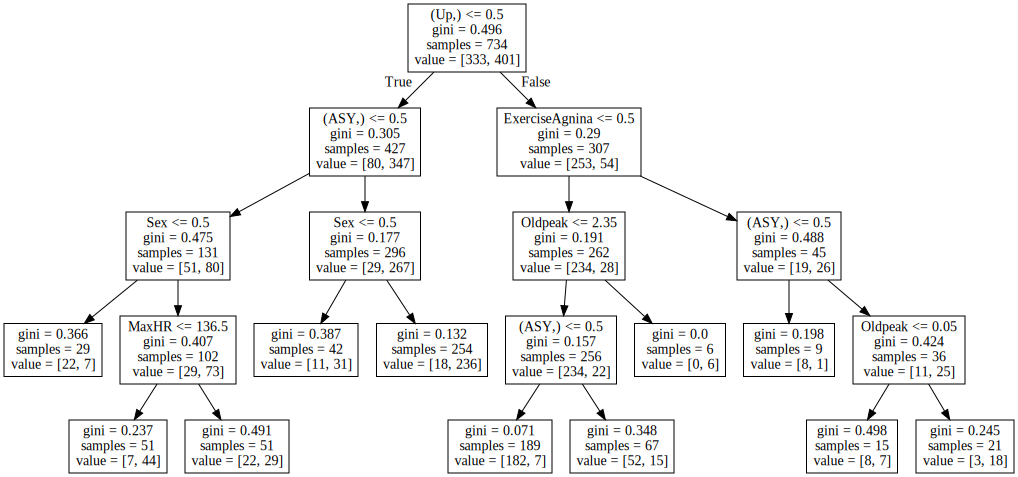

In [36]:
graphviz.Source(best_tree_cv_plot)

In [37]:
model3 = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 11)

In [38]:
model3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=11)

In [39]:
y_pred3 = model3.predict(X_test)

In [40]:
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[66 11]
 [21 86]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.80        77
           1       0.89      0.80      0.84       107

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.83      0.83       184



In [41]:
accuracy_score(y_test,y_pred3)

0.8260869565217391